In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

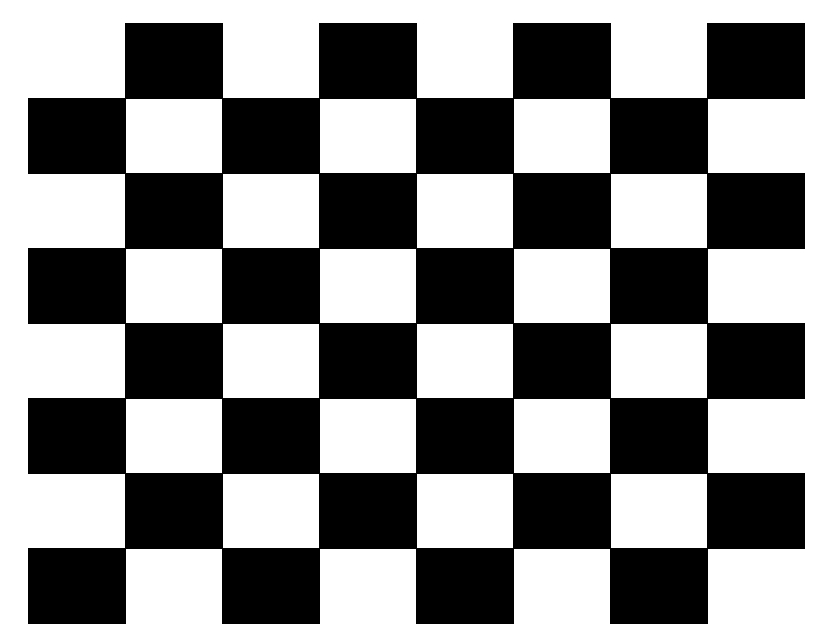

In [5]:
chess = cv2.imread('/content/drive/MyDrive/패턴인식/PR201910769/images/lab06_chess.jpg')
graychess = cv2.cvtColor(chess, cv2.COLOR_BGR2GRAY)

cv2_imshow(chess)

In [6]:
height, width = chess.shape[:2]

## x, y 축에 대한 강도 구하기 (Sobel 사용)
img_sobel_x = cv2.Sobel(graychess, cv2.CV_32F, 1, 0)
img_sobel_y = cv2.Sobel(graychess, cv2.CV_32F, 0, 1)

## 가로, 세로, 대각선에 대한 강도 변화 구하기
dxdx = img_sobel_x * img_sobel_x
dydy = img_sobel_y * img_sobel_y
dxdy = img_sobel_x * img_sobel_y

In [7]:
window_size = 5
offset = int(window_size/2)

my_cmap = np.zeros(graychess.shape)

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        window_dxdx = dxdx[y-offset:y+offset+1, x-offset:x+offset+1]
        window_dydy = dydy[y-offset:y+offset+1, x-offset:x+offset+1]
        window_dxdy = dxdy[y-offset:y+offset+1, x-offset:x+offset+1]

        Mxx = window_dxdx.sum()
        Myy = window_dydy.sum()
        Mxy = window_dxdy.sum()


        det = Mxx*Myy - Mxy*Mxy
        trace = Mxx + Myy

        my_cmap[y,x] = det - 0.04 * (trace ** 2)

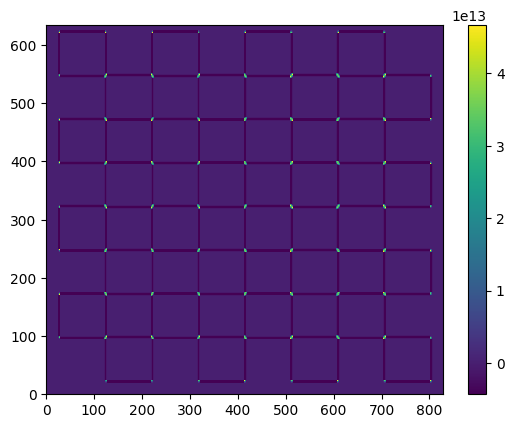

In [8]:
plt.pcolor(my_cmap)
plt.colorbar()
plt.show()

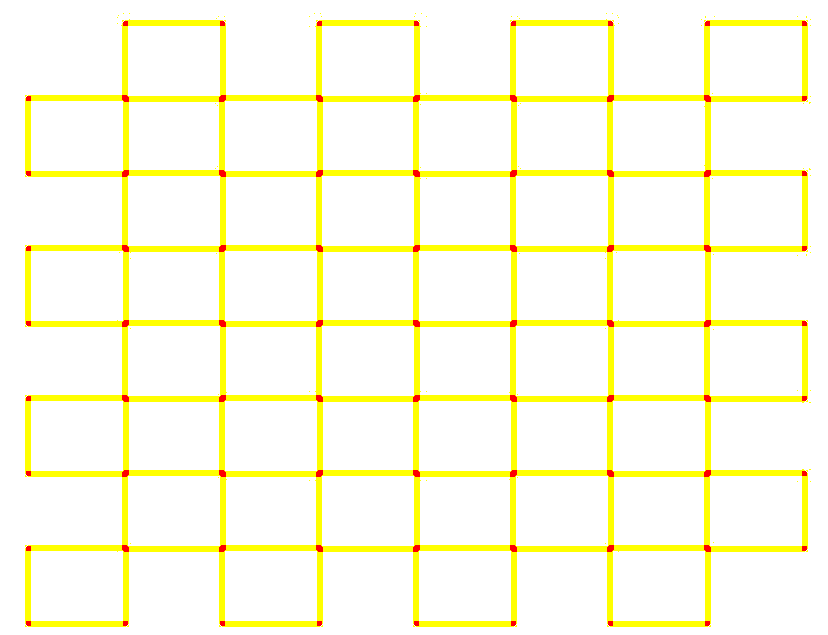

In [9]:
result_custom = np.copy(chess)

threshold = 0.01 * my_cmap.max()
# for y in range(offset, height-offset):
#     for x in range(offset, width-offset):
#         if my_cmap[y, x] > threshold:
#             result_custom[y, x] = [0, 0, 255]
#         elif my_cmap[y,x] < 0:
#              result_custom[y, x] = [255, 255, 255]
#         else:
#             result_custom[y, x] = [255, 255, 255]

result_custom[my_cmap > threshold] = [0, 0, 255]
result_custom[my_cmap <= threshold] = [255,255,255]
result_custom[my_cmap < 0] = [0, 255, 255]

cv2_imshow(result_custom)

In [10]:
c_map = cv2.cornerHarris(src=graychess,
                         blockSize=5,
                         ksize=3,
                         k=0.04)

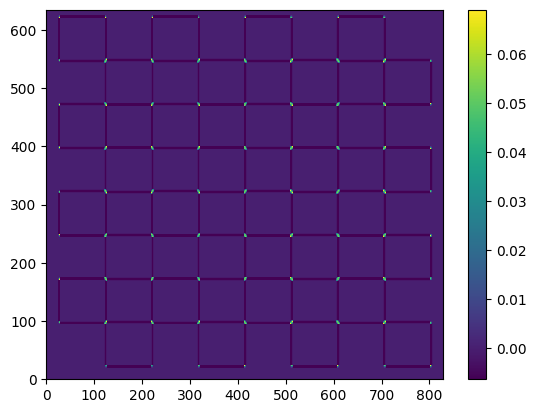

In [12]:
plt.pcolor(c_map)
plt.colorbar()
plt.show()

In [13]:
result = np.copy(chess)

threshold = 0.05 * c_map.max()         # threshold 정하기
result[c_map > threshold] = [0, 0, 255]   # C가 일정 임계값보다 크면 corner
result[c_map <= threshold] = [0, 0, 0]  # C가 0에 가까우면 flat
result[c_map < 0] = [255, 255, 255]       # C가 음수이면 edge

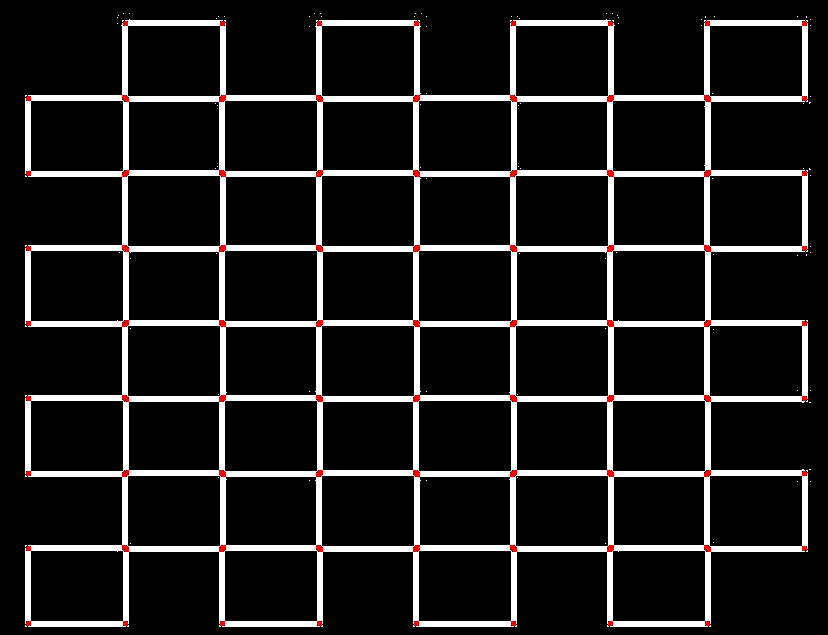

In [14]:
cv2_imshow(result)